In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Hp\OneDrive\Documents\Internship DevelopersHub tasks\Phase 2\Task 1\bank.csv", sep=";")
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nTarget distribution:")
print(df['y'].value_counts(normalize=True))

print("\nFirst 5 rows:")
print(df.head())

Shape: (4521, 17)
Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Target distribution:
y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64

First 5 rows:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185      

### **Encode Categorical Features**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate features and target
X = df.drop(columns=['y'])
y = df['y'].map({'yes': 1, 'no': 0})   # convert yes/no → 1/0

# Identify categorical & numeric columns
cat_cols = [c for c in X.columns if X[c].dtype == 'object']
num_cols = [c for c in X.columns if c not in cat_cols]

# Preprocessing: OneHot for categorical, Scale for numeric
preprocessor = ColumnTransformer([
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols),
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols)
])



### **Train Classification Models**

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression pipeline
log_reg = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])
log_reg.fit(X_train, y_train)

# Random Forest pipeline
rf = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300, random_state=42, class_weight="balanced"))
])
rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, random_state=42))])

### **Model Evaluation**


=== Logistic Regression ===
Confusion Matrix:
 [[664 137]
 [ 23  81]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9665    0.8290    0.8925       801
           1     0.3716    0.7788    0.5031       104

    accuracy                         0.8232       905
   macro avg     0.6690    0.8039    0.6978       905
weighted avg     0.8981    0.8232    0.8477       905

F1 Score: 0.5031055900621118

=== Random Forest ===
Confusion Matrix:
 [[791  10]
 [ 86  18]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9019    0.9875    0.9428       801
           1     0.6429    0.1731    0.2727       104

    accuracy                         0.8939       905
   macro avg     0.7724    0.5803    0.6078       905
weighted avg     0.8722    0.8939    0.8658       905

F1 Score: 0.2727272727272727


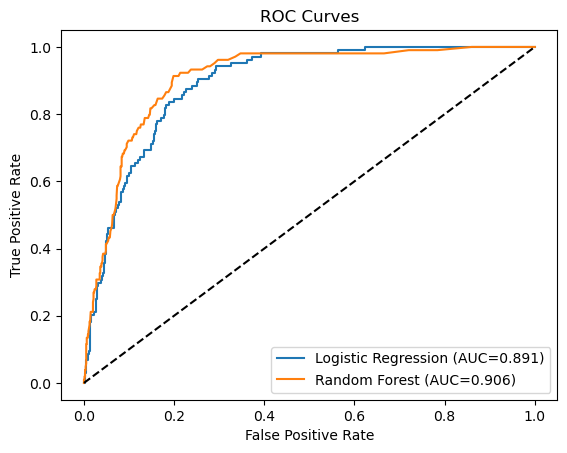

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_model(name, model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= 0.5).astype(int)

    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
    print("F1 Score:", f1_score(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

# Evaluate both models
plt.figure()
evaluate_model("Logistic Regression", log_reg, X_test, y_test)
evaluate_model("Random Forest", rf, X_test, y_test)

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


### **Explain Predictions with SHAP**

In [7]:
from lime.lime_tabular import LimeTabularExplainer

# Preprocessed train & test
X_train_trans = rf.named_steps["preprocessor"].fit_transform(X_train)
X_test_trans = rf.named_steps["preprocessor"].transform(X_test)

# Get feature names
feature_names = rf.named_steps["preprocessor"].get_feature_names_out()

# LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_trans.toarray(),
    feature_names=feature_names,
    class_names=['no', 'yes'],
    mode='classification'
)

# Explain 1 prediction
i = 10
exp = explainer.explain_instance(
    data_row=X_test_trans[i].toarray()[0],
    predict_fn=rf.named_steps["model"].predict_proba
)
exp.show_in_notebook(show_table=True)


ModuleNotFoundError: No module named 'lime'